# In Search of Normal

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
from datetime import timedelta
import yfinance as yf

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
raw_data = pd.read_csv('../../data/bt/GLD_GDX_AAPL_SPY__1D.csv',  parse_dates=True, index_col=0, header=[0, 1])
raw_data.head()

Close                                        High             \
                AAPL        GDX         GLD        SPY      AAPL        GDX   
Date                                                                          
2010-01-04  6.454506  42.180367  109.800003  86.315994  6.469285  42.657781   
2010-01-05  6.465666  42.587044  109.699997  86.544495  6.502159  43.037936   
2010-01-06  6.362820  43.621445  111.510002  86.605408  6.491301  44.266837   
2010-01-07  6.351058  43.409264  110.820000  86.971016  6.393886  43.647971   
2010-01-08  6.393282  44.063499  111.370003  87.260422  6.393886  44.063499   

                                        Low                                    \
                   GLD        SPY      AAPL        GDX         GLD        SPY   
Date                                                                            
2010-01-04  110.139999  86.361690  6.405346  42.047754  109.309998  84.929820   
2010-01-05  110.389999  86.582579  6.431585  41.941652  109.260002  85.950421   
2010-01-06  111.769997  86.818664  6.356185  43.064461  110.410004  86.392151   
2010-01-07  111.290001  87.077644  6.304914  42.923010  110.620003  86.201764   
2010-01-08  111.580002  87.298506  6.305216  42.993740  110.260002  86.567338   

                Open                                       Volume            \
                AAPL        GDX         GLD        SPY       AAPL       GDX   
Date                                                                          
2010-01-04  6.437014  42.242253  109.820000  85.584826  493729600  12508700   
2010-01-05  6.472301  42.410227  109.879997  86.262694  601904800  13787800   
2010-01-06  6.465665  43.250121  110.709999  86.460695  552160000  19322600   
2010-01-07  6.386345  43.621449  111.070000  86.445486  477131200  13312000   
2010-01-08  6.342613  43.771745  111.519997  86.742510  447610800  10719800   

                                 
                 GLD        SPY  
Date                             
2010-01-04  16224100  118944600  
2010-01-05  14213100  111579900  
2010-01-06  24981900  116074400  
2010-01-07  13609800  131091100  
2010-01-08  15894600  126402800

In [3]:
normal = lambda sl: stats.jarque_bera(sl).pvalue<0.05

In [4]:
tickers = {}
for ticker in raw_data.columns.levels[1]:
    tickers[ticker] = raw_data['Close'][ticker].copy().to_frame()
    tickers[ticker].columns = ['price']
    tickers[ticker]['return'] = np.log(tickers[ticker]['price'] / tickers[ticker]['price'].shift(1))
    
    for sample in range(30, 110, 10):
        tickers[ticker][f'Normal {sample}'] = tickers[ticker]['price'].rolling(sample).apply(normal)
        tickers[ticker][f'Mean {sample}'] = tickers[ticker]['price'].rolling(sample).mean()
        tickers[ticker][f'Variance {sample}'] = tickers[ticker]['price'].rolling(sample).var()

        tickers[ticker][f'Normal Return {sample}'] = tickers[ticker]['return'].rolling(sample).apply(normal)
        tickers[ticker][f'Mean Return {sample}'] = tickers[ticker]['return'].rolling(sample).mean()
        tickers[ticker][f'Variance Return {sample}'] = tickers[ticker]['return'].rolling(sample).var()
        

In [5]:
normal_size = []
normal_return_size = []
mean_size = []
var_size = []
mean_return_size = []
var_return_size = []
x_ticks = []
for sample in range(30, 110, 10):
    x_ticks.append(sample)
    normal_size.append(f'Normal {sample}')
    normal_return_size.append(f'Normal Return {sample}')
    mean_size.append(f'Mean {sample}')
    var_size.append(f'Variance {sample}')
    mean_return_size.append(f'Mean Return {sample}')
    var_return_size.append(f'Variance Return {sample}')
    

In [6]:
tickers['GDX'][var_size].tail()

,Variance 30,Variance 40,Variance 50,Variance 60,Variance 70,Variance 80,Variance 90,Variance 100
Date,,,,,,,,
2020-12-23,1.160124,2.820670,3.620428,3.806105,4.238583,5.221162,5.546494,6.283768
2020-12-24,1.109012,2.822719,3.356124,3.786916,3.939711,5.140322,5.442005,6.077211
2020-12-28,1.016369,2.826988,3.175669,3.752809,3.732524,5.060414,5.454894,5.870450
2020-12-29,0.852181,2.809668,3.034484,3.744895,3.588508,5.004529,5.401141,5.678074
2020-12-30,0.751565,2.700459,2.935006,3.672497,3.529621,4.937854,5.370259,5.567613


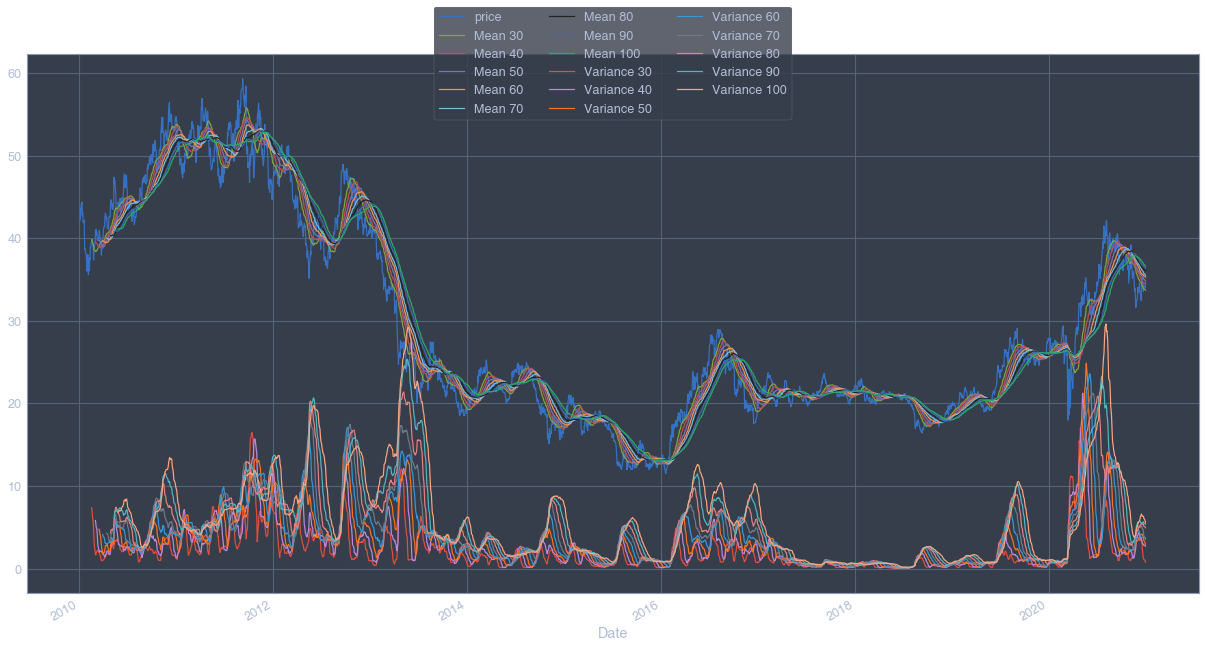

In [29]:
fig, ax = plt.subplots(1, figsize=(21, 11))

tickers['GDX'][['price']+mean_size+var_size].plot(ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

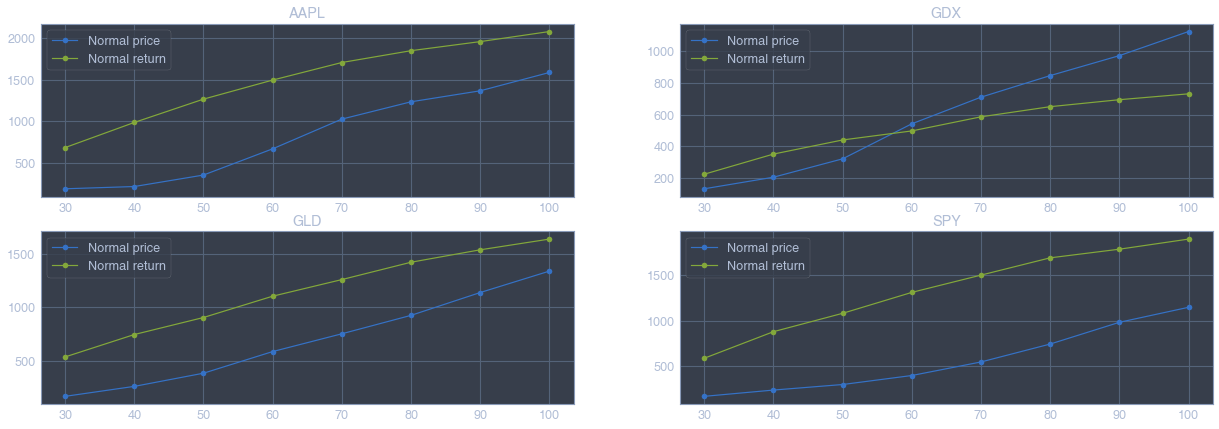

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(21, 7))

for ticker, coord in zip(tickers.keys(), [(i, j) for i in range(2) for j in range(2)]):
    axs[coord].plot(tickers[ticker].sum()[normal_size].to_list(), 'o-', label='Normal price')
    axs[coord].plot(tickers[ticker].sum()[normal_return_size].to_list(), 'o-', label='Normal return')
    axs[coord].set_xticks(axs[coord].get_xticks().tolist()[1:-1])
    axs[coord].set_xticklabels(x_ticks)
    axs[coord].set_title(ticker)
    axs[coord].legend()
    

In [15]:
def show_normal_for(ticker):
    for normal_price, normal_return in zip(normal_size, normal_return_size):
        fig, ax = plt.subplots(1, 2, figsize=(21, 7))
        ax[0].plot(tickers[ticker]['price'], c='g', label=ticker)
        ax_ = ax[0].twinx()
        tickers[ticker][normal_price].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label=normal_price)

        ax[1].plot(tickers[ticker]['return'], c='g', label=ticker)
        ax_ = ax[1].twinx()
        tickers[ticker][normal_return].plot(kind='area', ax=ax_, color=['b'], alpha=0.5, label=normal_return)

        ax[0].set_title(f'{ticker} normal price for {normal_price}')
        ax[1].set_title(f'{ticker} normal return for {normal_return}')
        ax[0].legend()
        ax[1].legend()
        

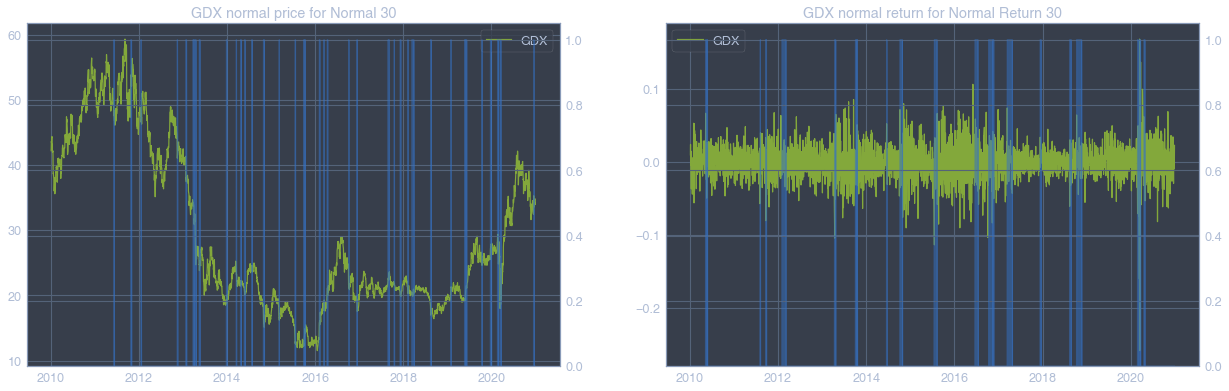

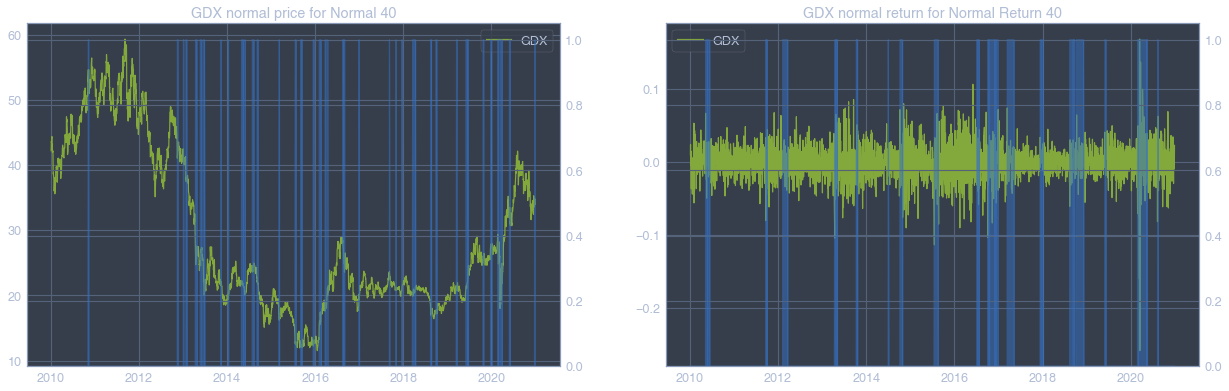

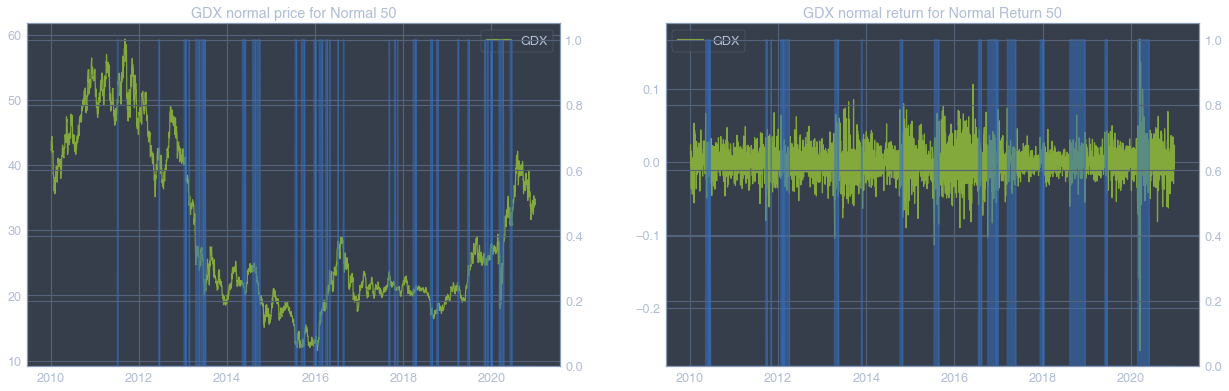

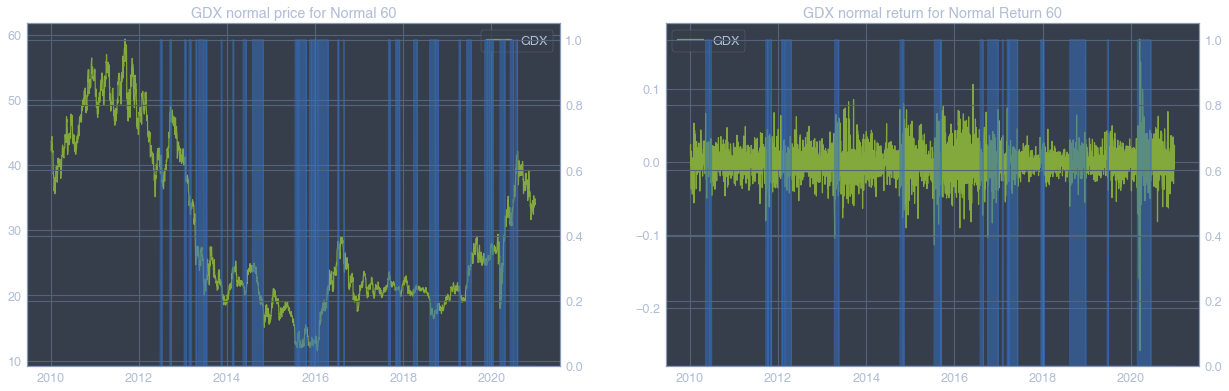

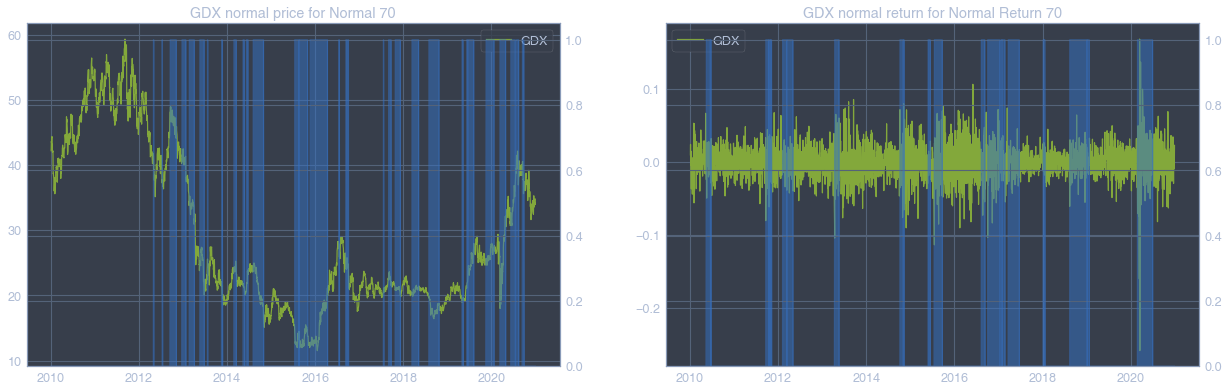

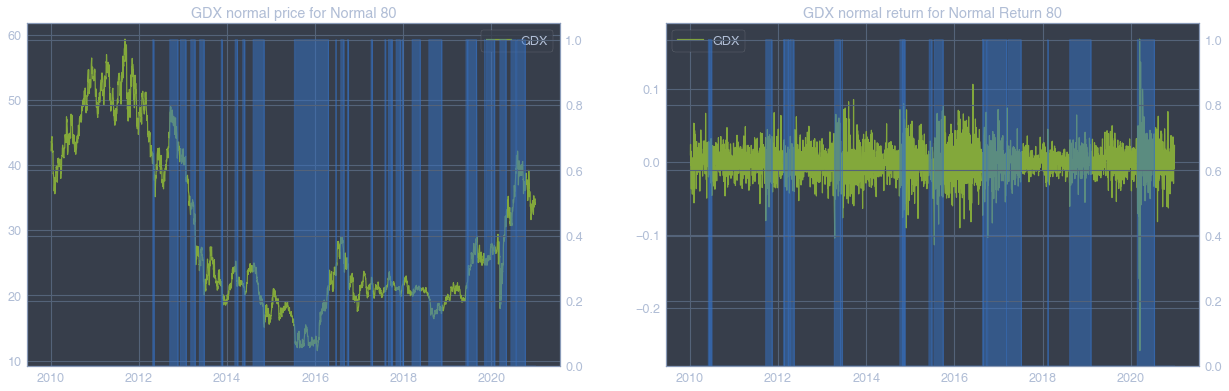

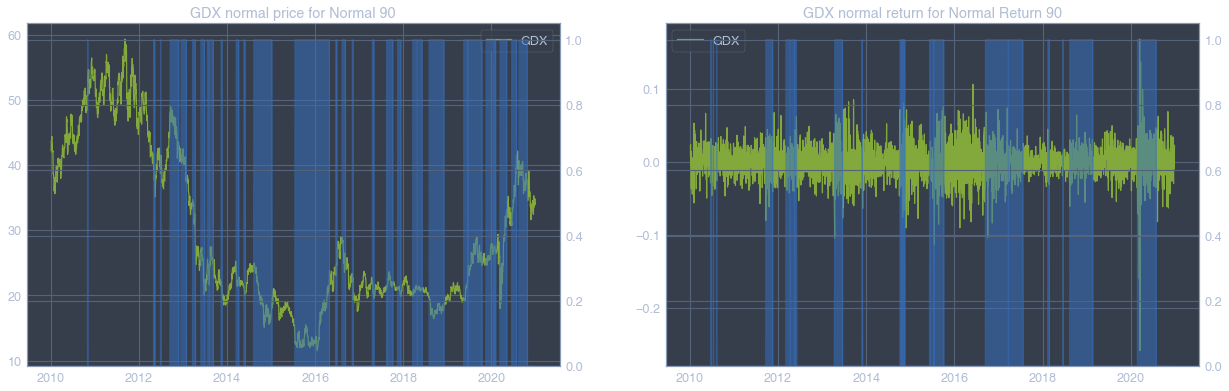

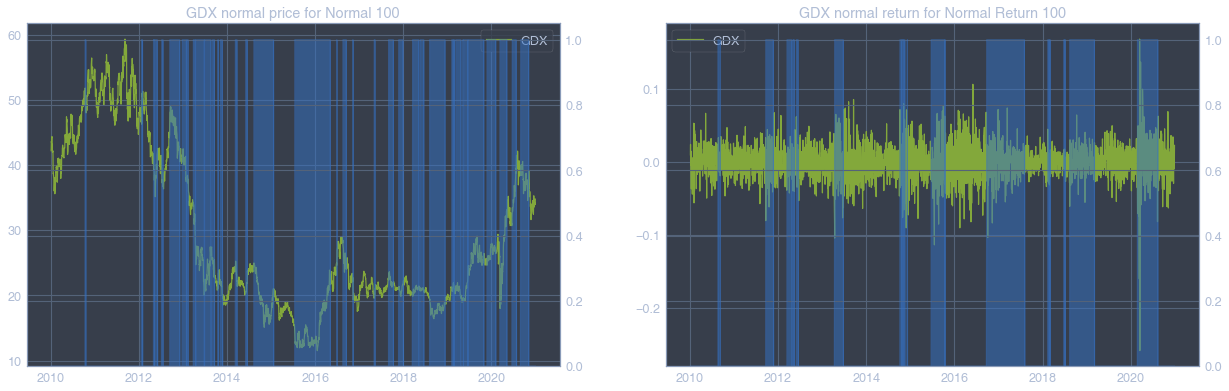

In [16]:
show_normal_for('GDX')

In [15]:
tickers['SPY'][normal_return_size].sample(10)

,Normal Return 30,Normal Return 40,Normal Return 50,Normal Return 60,Normal Return 70,Normal Return 80,Normal Return 90,Normal Return 100
Date,,,,,,,,
2020-08-27,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-01-22,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2014-08-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-07-20,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-15,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-10-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-10-09,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
2013-01-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
for ticker in tickers.keys():
    for sample in range(30, 110, 10):
        tickers[ticker][f'Normal cumsum {sample}'] = tickers[ticker][f'Normal {sample}'].cumsum()
        tickers[ticker][f'Normal Return cumsum {sample}'] = tickers[ticker][f'Normal Return {sample}'].cumsum()

tickers['SPY'].sample(10)

,price,return,Normal 30,Mean 30,Variance 30,Normal Return 30,Mean Return 30,Variance Return 30,Normal 40,Mean 40,...,Normal cumsum 60,Normal Return cumsum 60,Normal cumsum 70,Normal Return cumsum 70,Normal cumsum 80,Normal Return cumsum 80,Normal cumsum 90,Normal Return cumsum 90,Normal cumsum 100,Normal Return cumsum 100
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-24,218.924622,-0.000243,0.0,216.034372,2.596096,0.0,0.000626,0.000021,0.0,215.653451,...,332.0,745.0,424.0,840.0,566.0,964.0,770.0,1005.0,877.0,1088.0
2018-04-20,239.822952,-0.008516,0.0,240.081673,26.985438,0.0,-0.000790,0.000166,0.0,241.151309,...,333.0,884.0,441.0,984.0,610.0,1118.0,835.0,1166.0,953.0,1259.0
2017-05-31,213.113419,-0.000248,0.0,210.776078,3.208616,1.0,0.001062,0.000024,0.0,209.857212,...,332.0,708.0,424.0,803.0,554.0,927.0,750.0,968.0,863.0,1051.0
2012-11-13,110.886787,-0.003478,0.0,114.858779,4.168348,0.0,-0.001462,0.000062,0.0,115.339977,...,51.0,193.0,63.0,211.0,63.0,254.0,126.0,262.0,171.0,299.0
2020-11-23,337.297363,0.005977,0.0,327.394029,90.188079,0.0,0.000472,0.000151,0.0,325.672047,...,396.0,1305.0,545.0,1490.0,740.0,1667.0,981.0,1760.0,1137.0,1871.0
2019-08-28,266.194336,0.007017,0.0,269.770753,28.330778,0.0,-0.001006,0.000159,0.0,271.162049,...,362.0,1055.0,492.0,1191.0,676.0,1356.0,897.0,1447.0,1034.0,1558.0
2015-12-01,180.191833,0.009490,0.0,177.759714,4.336204,0.0,0.001177,0.000060,0.0,176.293468,...,185.0,525.0,238.0,615.0,284.0,721.0,430.0,748.0,542.0,818.0
2016-11-16,190.353745,-0.001880,0.0,186.895054,4.324294,1.0,0.000344,0.000038,0.0,187.278976,...,273.0,627.0,353.0,717.0,466.0,833.0,665.0,870.0,774.0,944.0
2012-03-09,109.076225,0.003860,0.0,107.317621,2.201169,0.0,0.001408,0.000034,0.0,106.442682,...,43.0,151.0,60.0,169.0,63.0,214.0,103.0,222.0,134.0,259.0


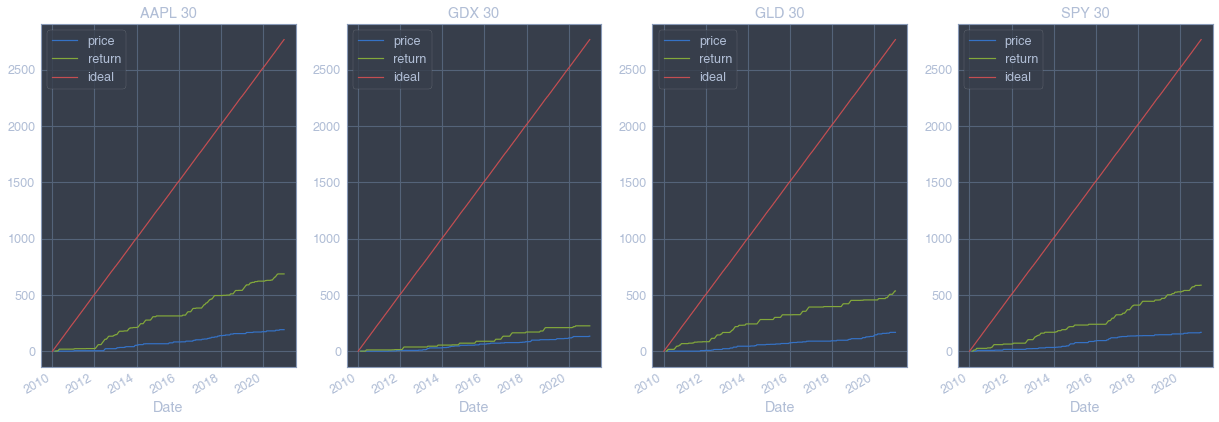

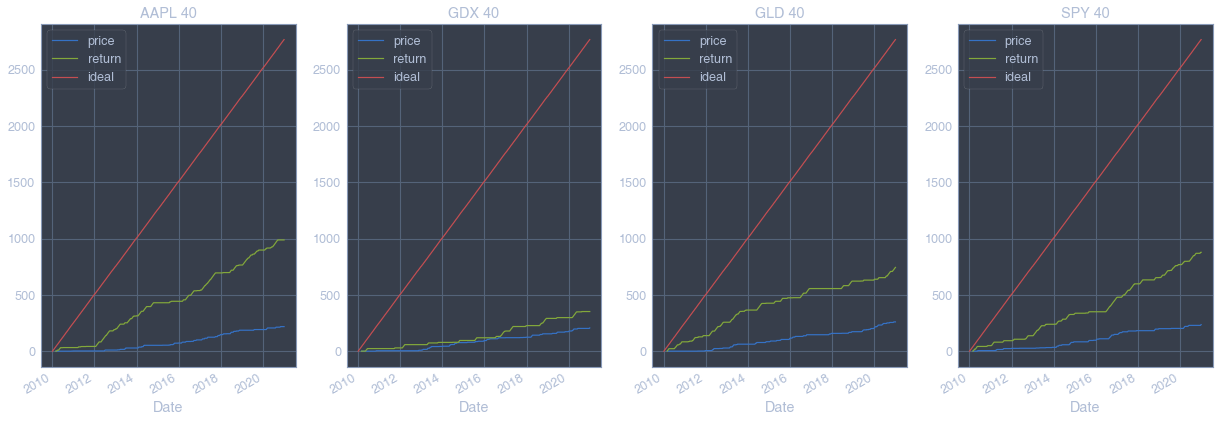

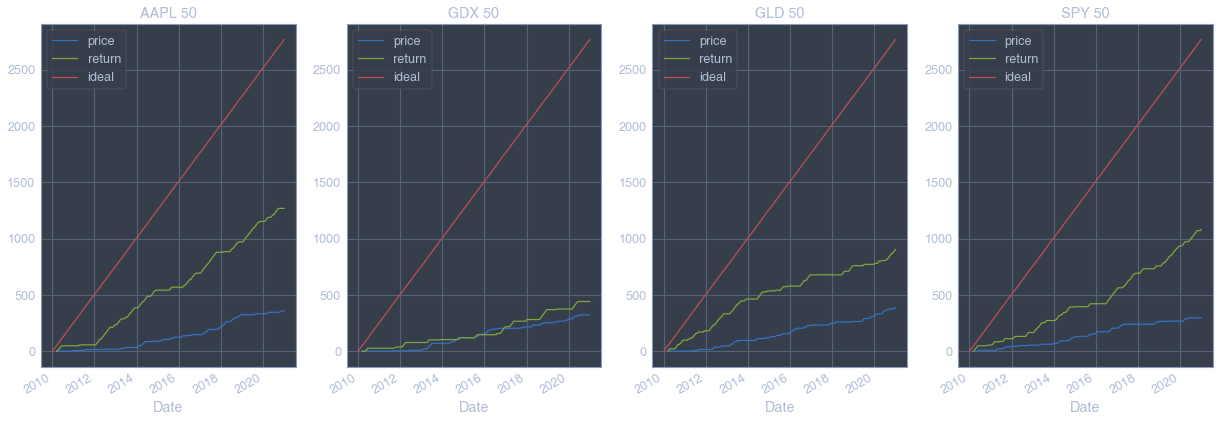

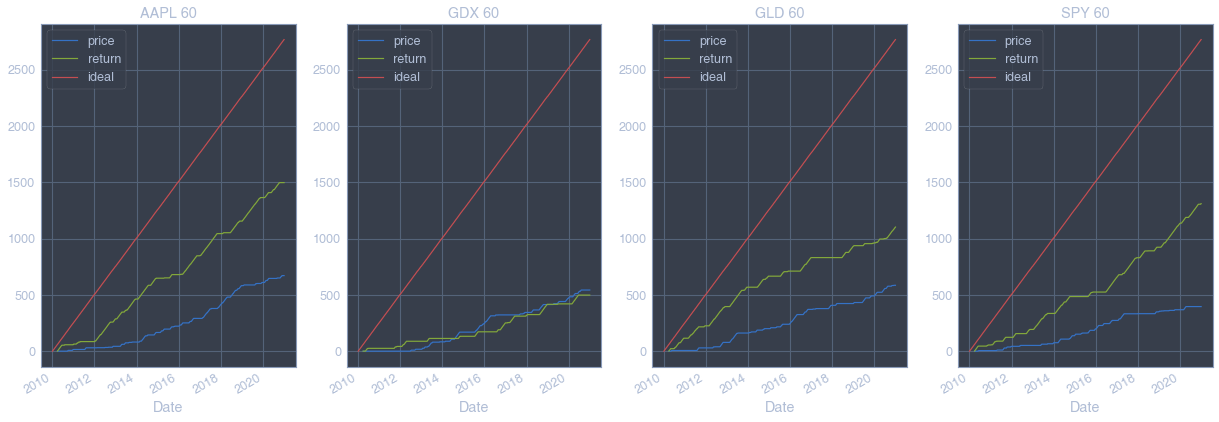

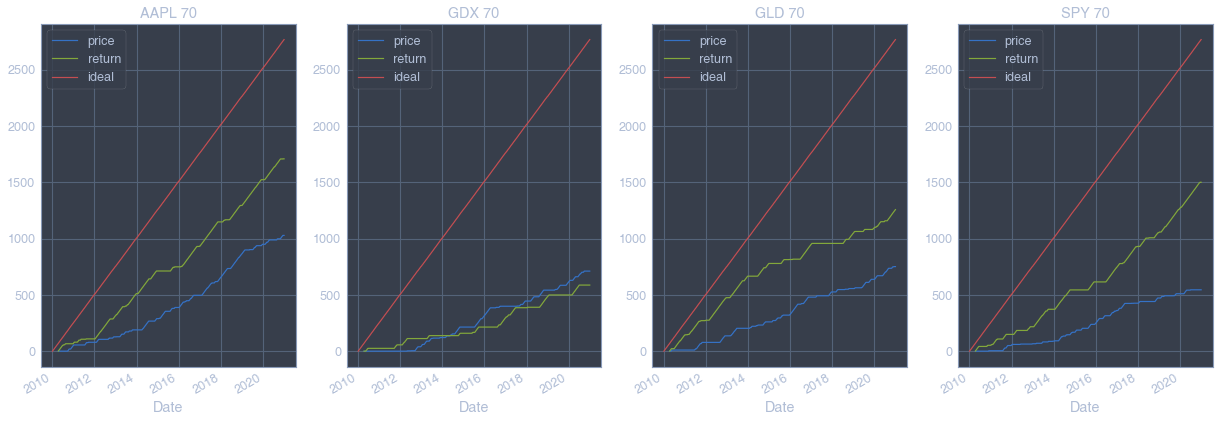

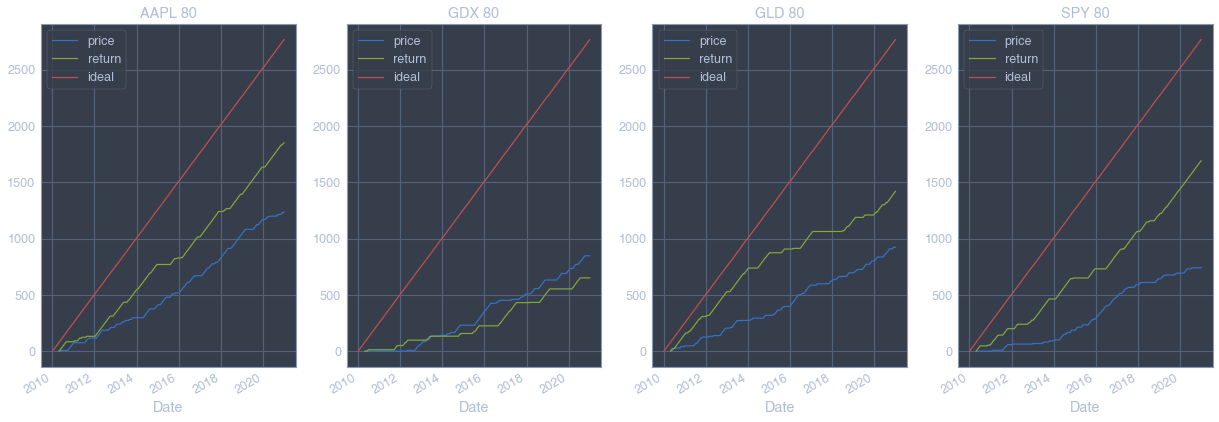

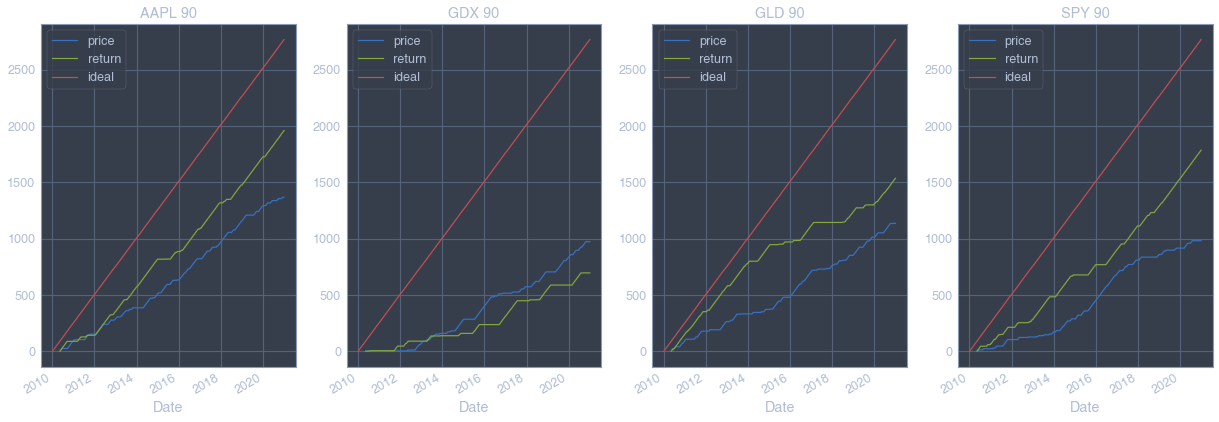

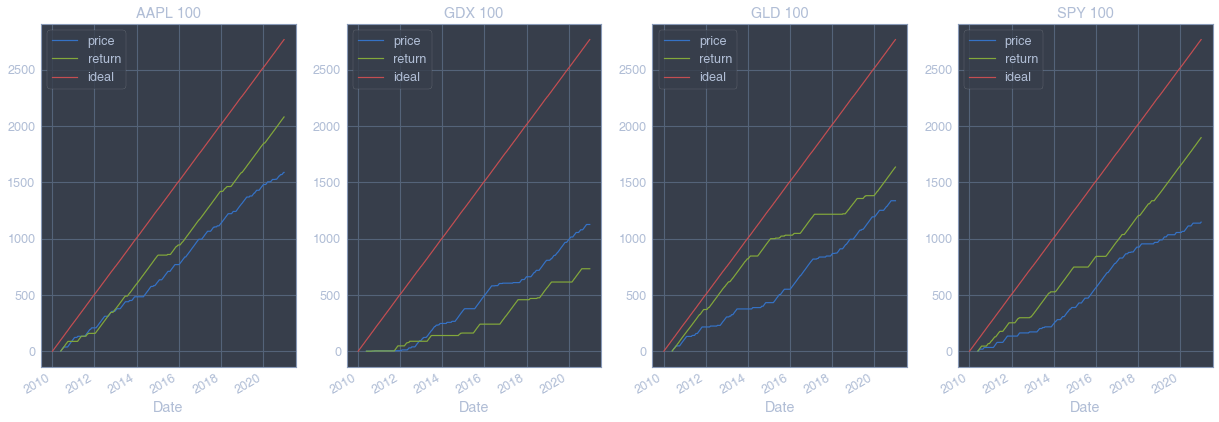

In [22]:
for sample in range(30, 110, 10):
    fig, axs = plt.subplots(1, 4, figsize=(21, 7))
    for i, ticker in enumerate(tickers.keys()):
        tickers[ticker][f'Normal cumsum {sample}'].plot(ax=axs[i], label='price')
        tickers[ticker][f'Normal Return cumsum {sample}'].plot(ax=axs[i], label='return')
        axs[i].plot(tickers[ticker].index, np.arange(len(tickers[ticker].index)), label='ideal')
        axs[i].set_title(ticker + ' ' + str(sample))
        axs[i].legend()

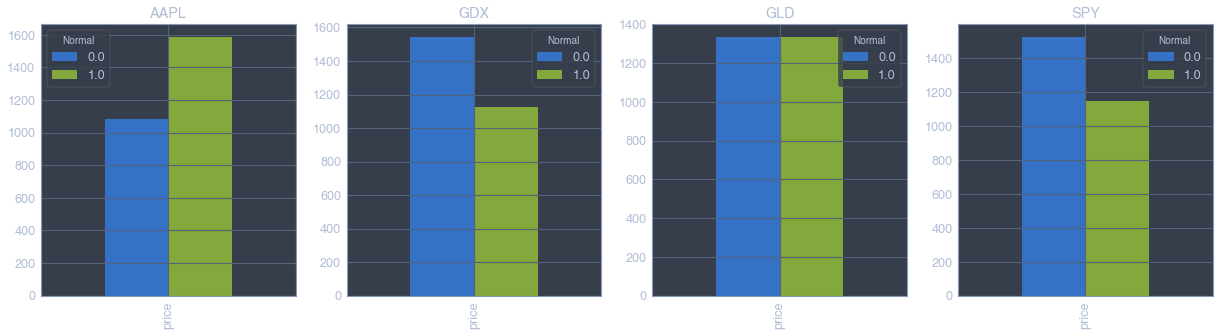

In [13]:
# rewrite
fig, axs = plt.subplots(1, 4, figsize=(21, 5))
for i, ticker in enumerate(tickers.keys()):
    tickers[ticker].groupby('Normal').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i])
    axs[i].set_title(ticker)

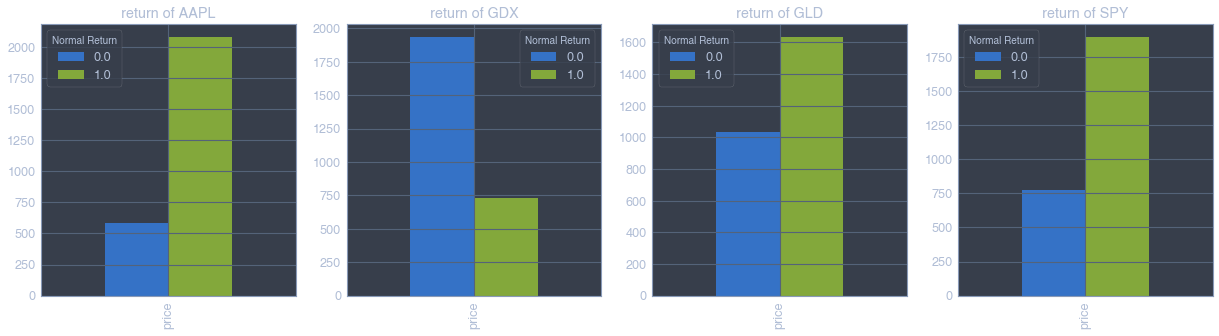

In [15]:
# rewrite
fig, axs = plt.subplots(1, 4, figsize=(21, 5))
for i, ticker in enumerate(tickers.keys()):
    tickers[ticker].groupby('Normal Return').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'return of {ticker}')

In [49]:
for ticker, data in tickers.items():
    data['trend'] = np.sign(data['return'])

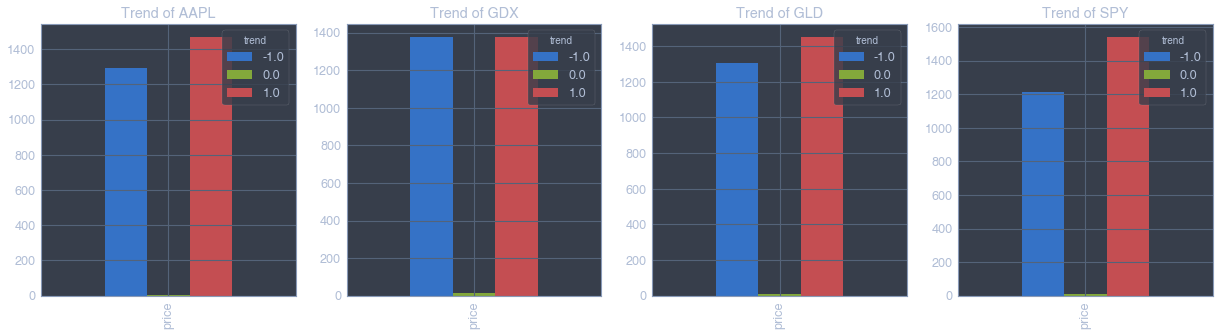

In [50]:
fig, axs = plt.subplots(1, 4, figsize=(21, 5))
for i, ticker in enumerate(tickers.keys()):
    tickers[ticker].groupby('trend').count()['price'].to_frame().T.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Trend of {ticker}')

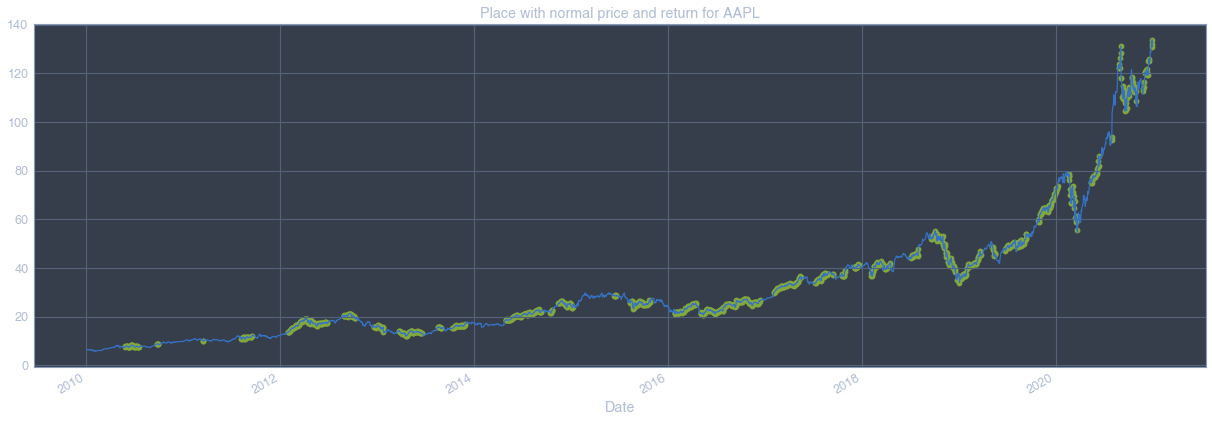

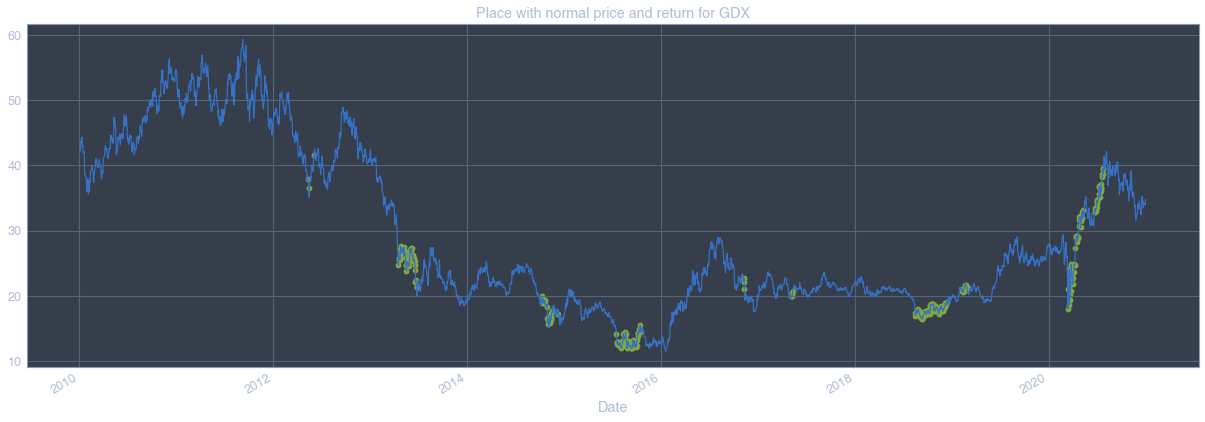

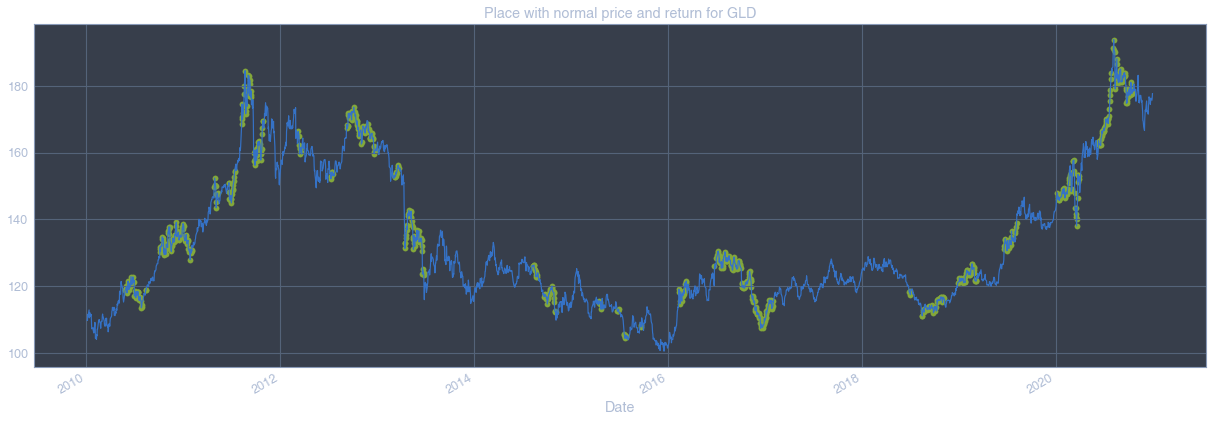

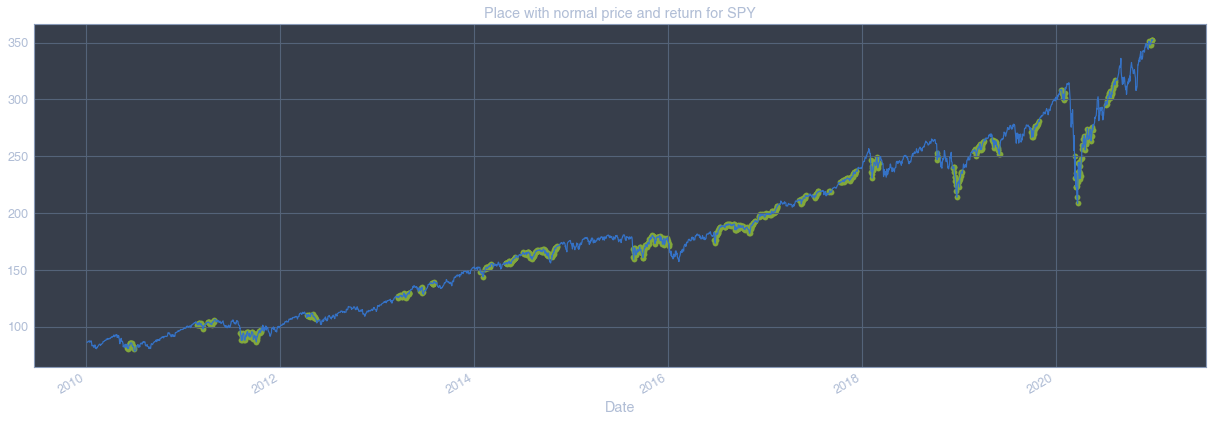

In [27]:
for ticker, data in tickers.items():
    normal_price_and_return = data[(data['Normal']==1) & ((data['Normal Return']==1))]['price']

    fig, ax = plt.subplots(1, figsize=(21, 7))
    data['price'].plot(ax=ax)
    ax.scatter(normal_price_and_return.index, normal_price_and_return, c='g')
    ax.set_title(f'Place with normal price and return for {ticker}')
    

## Review of Normal Intervals

In [7]:
aapl = tickers['AAPL']
aapl.sample(10)

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum
Date,,,,,,
2014-10-06,22.113331,0.000000,0.0,1.0,575.0,789.0
2014-08-15,21.749283,0.004911,1.0,1.0,559.0,754.0
2020-11-27,114.133553,0.004815,1.0,1.0,1571.0,2058.0
2015-01-28,25.707136,0.054993,1.0,0.0,632.0,853.0
2014-10-21,22.745964,0.026803,1.0,1.0,581.0,800.0
2010-05-12,7.904591,0.021481,NaN,NaN,NaN,NaN
2010-04-06,7.224487,0.004393,NaN,NaN,NaN,NaN
2018-12-26,37.570808,0.068053,1.0,0.0,1309.0,1587.0
2016-09-22,26.431215,0.009379,1.0,1.0,937.0,1107.0


In [57]:
aapl.shape

(2768, 4)

In [ ]:
def get_interval(ticker, date):
    start = tickers[ticker].index.get_loc(date)-99
    end = tickers[ticker].index.get_loc(date)+1
    return tickers[ticker].iloc[start:end]

In [8]:
normal = aapl[aapl['Normal']==1].index
normal_return =  aapl[aapl['Normal Return']==1].index
normal.shape, normal_return.shape

((1588,), (2080,))

In [21]:
normal_intervals = []
for n in normal:
    normal_intervals.append(get_interval('AAPL', n))

In [22]:
normal_return_intervals = []
for n in normal_return:
    normal_return_intervals.append(get_interval('AAPL', n))

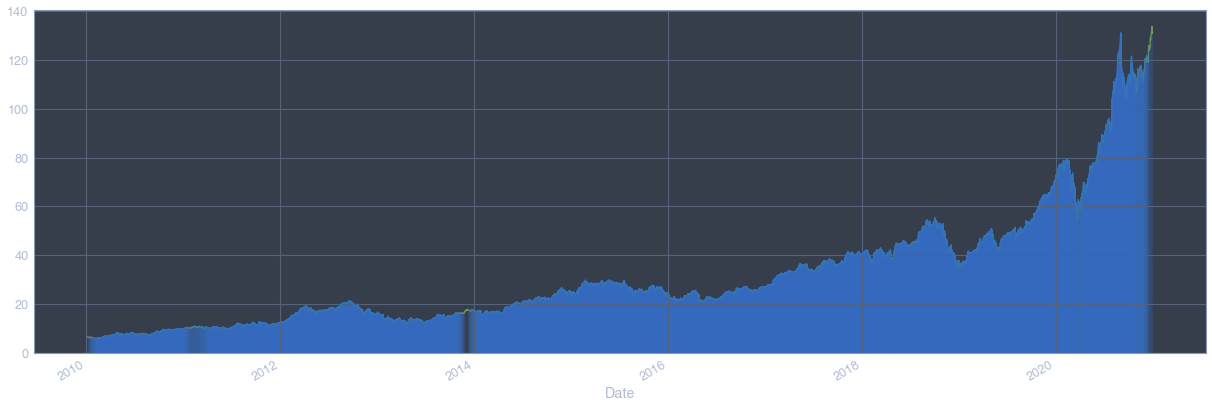

In [56]:
fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['price'], c='g')
for i in normal_intervals:
    i['price'].plot(kind='area', ax=ax, color=['b'], alpha=0.1)

Text(0.5, 1.0, 'AAPL. not normal intervals')

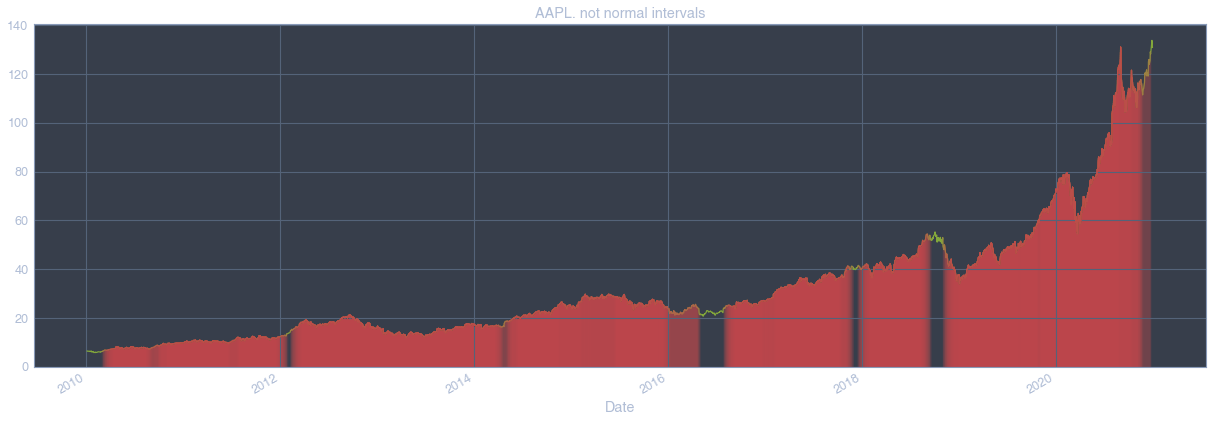

In [59]:
not_normal = aapl[aapl['Normal']==0].index

not_normal_intervals = []
for n in not_normal:
    not_normal_intervals.append(get_interval('AAPL', n))

fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['price'], c='g')
for i in not_normal_intervals:
    i['price'].plot(kind='area', ax=ax, color=['r'], alpha=0.1)
ax.set_title('AAPL. not normal intervals')

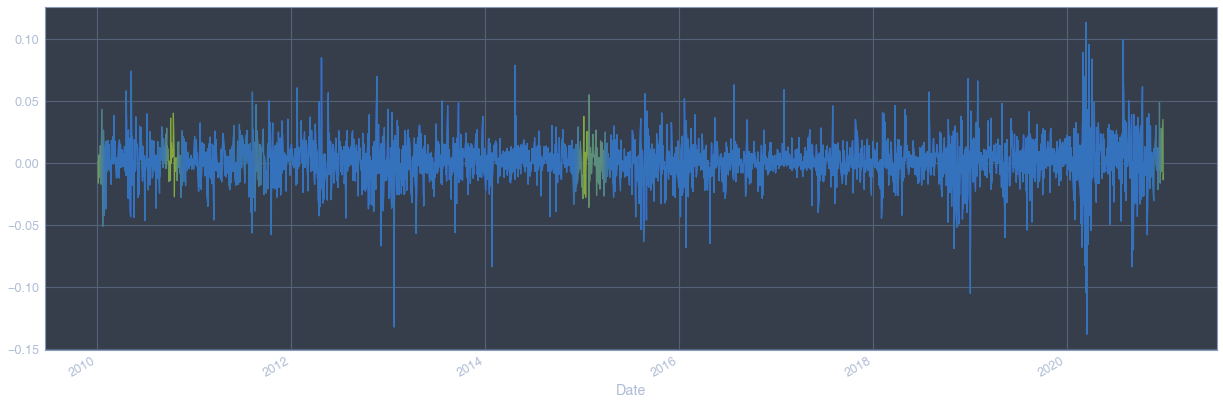

In [25]:
fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['return'], c='g')
for i in normal_return_intervals:
    i['return'].plot(ax=ax, color=['b'], alpha=0.1)
ax.set_title('AAPL. normal intervals')

Text(0.5, 1.0, 'AAPL. not normal intervals')

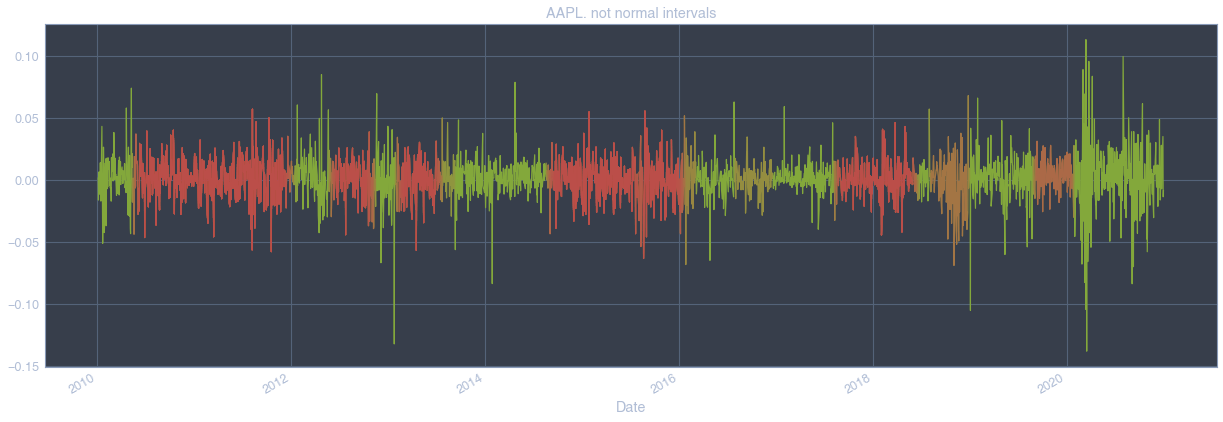

In [27]:
not_normal = aapl[aapl['Normal Return']==0].index

not_normal_reutrn_intervals = []
for n in not_normal:
    not_normal_reutrn_intervals.append(get_interval('AAPL', n))

fig, ax = plt.subplots(1, figsize=(21, 7))

ax.plot(aapl['return'], c='g')
for i in not_normal_reutrn_intervals:
    i['return'].plot(ax=ax, color=['r'], alpha=0.1)
ax.set_title('AAPL. not normal intervals')

In [13]:
# AAPL
len(normal_intervals), len(normal_return_intervals)

(1588, 2080)

In [23]:
normal_intervals[0].tail()

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum,trend
Date,,,,,,,
2010-05-20,7.170802,-0.043537,NaN,NaN,NaN,NaN,-1.0
2010-05-21,7.308330,0.018997,NaN,NaN,NaN,NaN,1.0
2010-05-24,7.442242,0.018157,NaN,NaN,NaN,NaN,1.0
2010-05-25,7.395792,-0.006261,NaN,NaN,NaN,NaN,-1.0
2010-05-26,7.362315,-0.004537,1.0,NaN,1.0,NaN,-1.0


In [24]:
normal_return_intervals[0].tail()

,price,return,Normal,Normal Return,Normal cumsum,Normal Return cumsum,trend
Date,,,,,,,
2010-05-21,7.308330,0.018997,NaN,NaN,NaN,NaN,1.0
2010-05-24,7.442242,0.018157,NaN,NaN,NaN,NaN,1.0
2010-05-25,7.395792,-0.006261,NaN,NaN,NaN,NaN,-1.0
2010-05-26,7.362315,-0.004537,1.0,NaN,1.0,NaN,-1.0
2010-05-27,7.640992,0.037153,1.0,1.0,2.0,1.0,1.0


In [46]:
pos = []
neg = []
for n in normal_intervals:
    result = n.groupby('trend').count()['price'].values
    neg.append(result[0])
    pos.append(result[1])

print(f'Negative trend mean: {np.mean(neg)}')
print(f'Positive trend mean: {np.mean(pos)}')

Negative trend mean: 46.57367758186398
Positive trend mean: 44.41183879093199


In [48]:
pos = []
neg = []
for n in normal_return_intervals:
    result = n.groupby('trend').count()['price'].values
    neg.append(result[0])
    pos.append(result[1])

print(f'Negative trend mean: {np.mean(neg)}')
print(f'Positive trend mean: {np.mean(pos)}')

Negative trend mean: 46.6375
Positive trend mean: 45.129326923076924
